In [ ]:
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure matplotlib plots display inline within Jupyter notebooks
%matplotlib inline

# Set pandas option to limit the display width of columns to 20 characters
# Useful for viewing columns with long string data, such as hashed values
pd.set_option('display.max_colwidth', 20)

In [2]:
# Load datasets with data
df = pd.read_csv("creditcard.csv")
df_original = df.copy()
df_original

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
from datetime import datetime, timedelta

# definiamo la data di inizio delle registrazioni (1 settembre 2013 00:00:00)
start_date = datetime(2013, 9, 1, 0, 0, 0)

# contertiamo la colonna del df in formato timestamp
df['Time'] = df['Time'].apply(lambda x: start_date + timedelta(seconds=x))
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2013-09-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2013-09-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2013-09-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,2013-09-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2013-09-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,2013-09-02 23:59:46,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,2013-09-02 23:59:47,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,2013-09-02 23:59:48,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,2013-09-02 23:59:48,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
#aggiungiamo al dataset due colonne: dow, hour
df['dow'] = pd.to_datetime(df['Time']).dt.day_name()
df['ora'] = pd.to_datetime(df['Time']).dt.hour
df.insert(loc=1, column='dow', value=df.pop('dow'))
df.insert(loc=1, column='ora', value=df.pop('ora'))
df

,Time,ora,dow,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2013-09-01 00:00:00,0,Sunday,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2013-09-01 00:00:00,0,Sunday,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2013-09-01 00:00:01,0,Sunday,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,2013-09-01 00:00:01,0,Sunday,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2013-09-01 00:00:02,0,Sunday,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,2013-09-02 23:59:46,23,Monday,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,2013-09-02 23:59:47,23,Monday,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,2013-09-02 23:59:48,23,Monday,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,2013-09-02 23:59:48,23,Monday,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# controlliamo la presenza di valori nulli nel df
df.isnull().sum()

Time      0
ora       0
dow       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# selezioniamo le parti di dataset relative a registrazioni legittimi class = 0, e frodi class = 1
df_legit = df.loc[df['Class'] == 0]
df_fraud = df.loc[df['Class'] == 1]
df

,Time,ora,dow,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2013-09-01 00:00:00,0,Sunday,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2013-09-01 00:00:00,0,Sunday,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2013-09-01 00:00:01,0,Sunday,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,2013-09-01 00:00:01,0,Sunday,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2013-09-01 00:00:02,0,Sunday,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,2013-09-02 23:59:46,23,Monday,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,2013-09-02 23:59:47,23,Monday,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,2013-09-02 23:59:48,23,Monday,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,2013-09-02 23:59:48,23,Monday,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
# calcoliamo le statistiche descrittive rrispetto ai due df
df_legit.describe(include='all')

,Time,ora,dow,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315,284315.000000,284315,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,144505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2013-09-02 02:20...,14.050623,NaN,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
min,2013-09-01 00:00:00,0.000000,NaN,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,2013-09-01 15:03:50,10.000000,NaN,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,2013-09-01 23:31:51,15.000000,NaN,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,2013-09-02 14:42:13,19.000000,NaN,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,2013-09-02 23:59:52,23.000000,NaN,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [8]:
df_fraud.describe(include='all')

,Time,ora,dow,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492,492.000000,492,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2013-09-01 22:25...,11.646341,NaN,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
min,2013-09-01 00:06:46,0.000000,NaN,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,2013-09-01 11:27...,5.000000,NaN,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,2013-09-01 20:59...,12.000000,NaN,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,2013-09-02 11:41:23,17.000000,NaN,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,2013-09-02 23:19:08,23.000000,NaN,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [9]:
df.name = 'df'
df_fraud.name = 'df_fraud'
df_legit.name = 'df_legit'

In [10]:
def compute_quantile(df):
    quantiles = []
    for n in np.arange(0.0, 1.0, 0.1):
        # Calculate the quantile of the 'Amount' column in df
        quantile_value = df.Amount.quantile(n)
        quantiles.append(quantile_value)
        # Print the quantile value along with meaningful information
        print(f"Quantile {n} for {df.name}: {quantile_value:.2f}")
    quantiles_df = pd.DataFrame({'Quantile': np.arange(0.0, 1.0, 0.1), 'Amount': quantiles})

    # plot 
    fig=plt.figure(figsize=(10, 6))
    sns.lineplot(data=quantiles_df, x='Quantile', y='Amount', marker='o')
    plt.title(f'{df.name } quantile plot')
    plt.xlabel('Quantile')
    plt.ylabel('Amount')
    plt.xticks(np.arange(0.0, 1.0, 0.1))
    plt.grid(True)
    plt.show()
    fig.savefig(f"plot/Quantile {df.name}.png", bbox_inches='tight')

Quantile 0.0 for df: 0.00
Quantile 0.1 for df: 1.00
Quantile 0.2 for df: 3.57
Quantile 0.30000000000000004 for df: 8.91
Quantile 0.4 for df: 13.00
Quantile 0.5 for df: 22.00
Quantile 0.6000000000000001 for df: 37.00
Quantile 0.7000000000000001 for df: 59.80
Quantile 0.8 for df: 100.00
Quantile 0.9 for df: 203.00


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


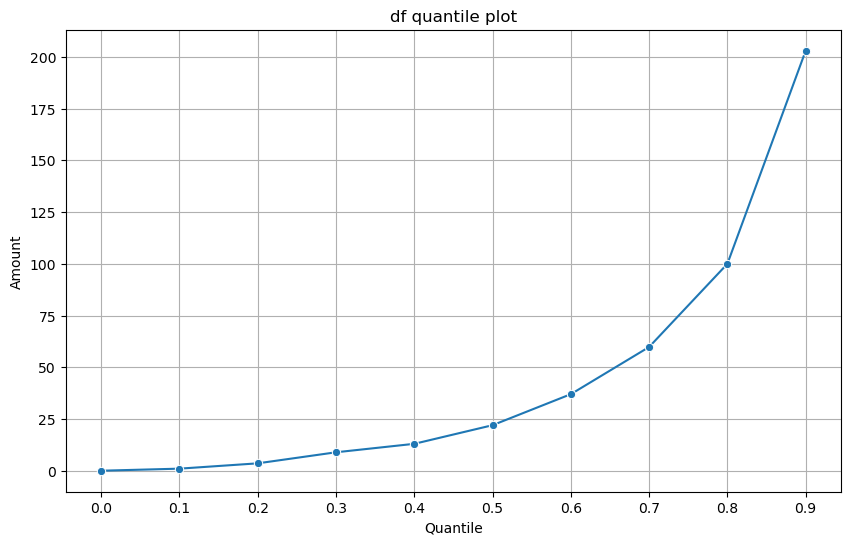

In [11]:
compute_quantile(df)

Quantile 0.0 for df_legit: 0.00
Quantile 0.1 for df_legit: 1.00
Quantile 0.2 for df_legit: 3.58
Quantile 0.30000000000000004 for df_legit: 8.92
Quantile 0.4 for df_legit: 13.03
Quantile 0.5 for df_legit: 22.00
Quantile 0.6000000000000001 for df_legit: 37.00
Quantile 0.7000000000000001 for df_legit: 59.78
Quantile 0.8 for df_legit: 100.00
Quantile 0.9 for df_legit: 202.72


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


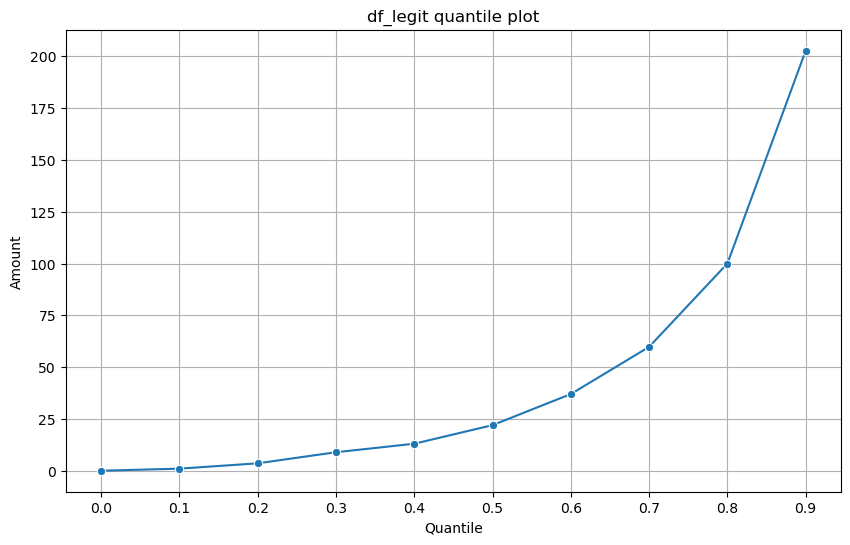

In [12]:
compute_quantile(df_legit)

Quantile 0.0 for df_fraud: 0.00
Quantile 0.1 for df_fraud: 0.76
Quantile 0.2 for df_fraud: 1.00
Quantile 0.30000000000000004 for df_fraud: 1.00
Quantile 0.4 for df_fraud: 2.00
Quantile 0.5 for df_fraud: 9.25
Quantile 0.6000000000000001 for df_fraud: 39.99
Quantile 0.7000000000000001 for df_fraud: 99.99
Quantile 0.8 for df_fraud: 152.34
Quantile 0.9 for df_fraud: 346.75


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


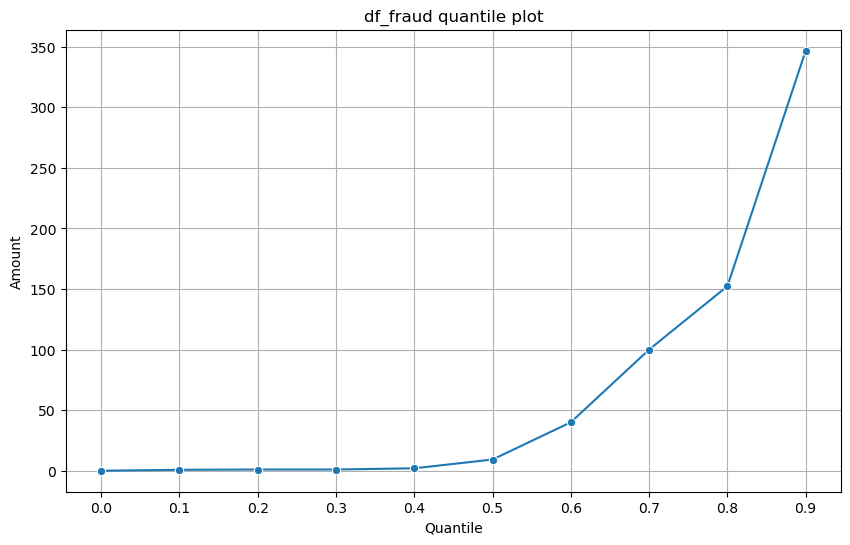

In [13]:
compute_quantile(df_fraud)

In [ ]:
min(df['Amount'])

In [ ]:
max(df['Amount'])

In [ ]:
# calcoliamo la mediana

legit_median = df[df["Class"] == 0].Amount.describe()["50%"]
fraud_median = df[df["Class"] == 1].Amount.describe()["50%"]

legit_median, fraud_median

In [20]:
## Graphics

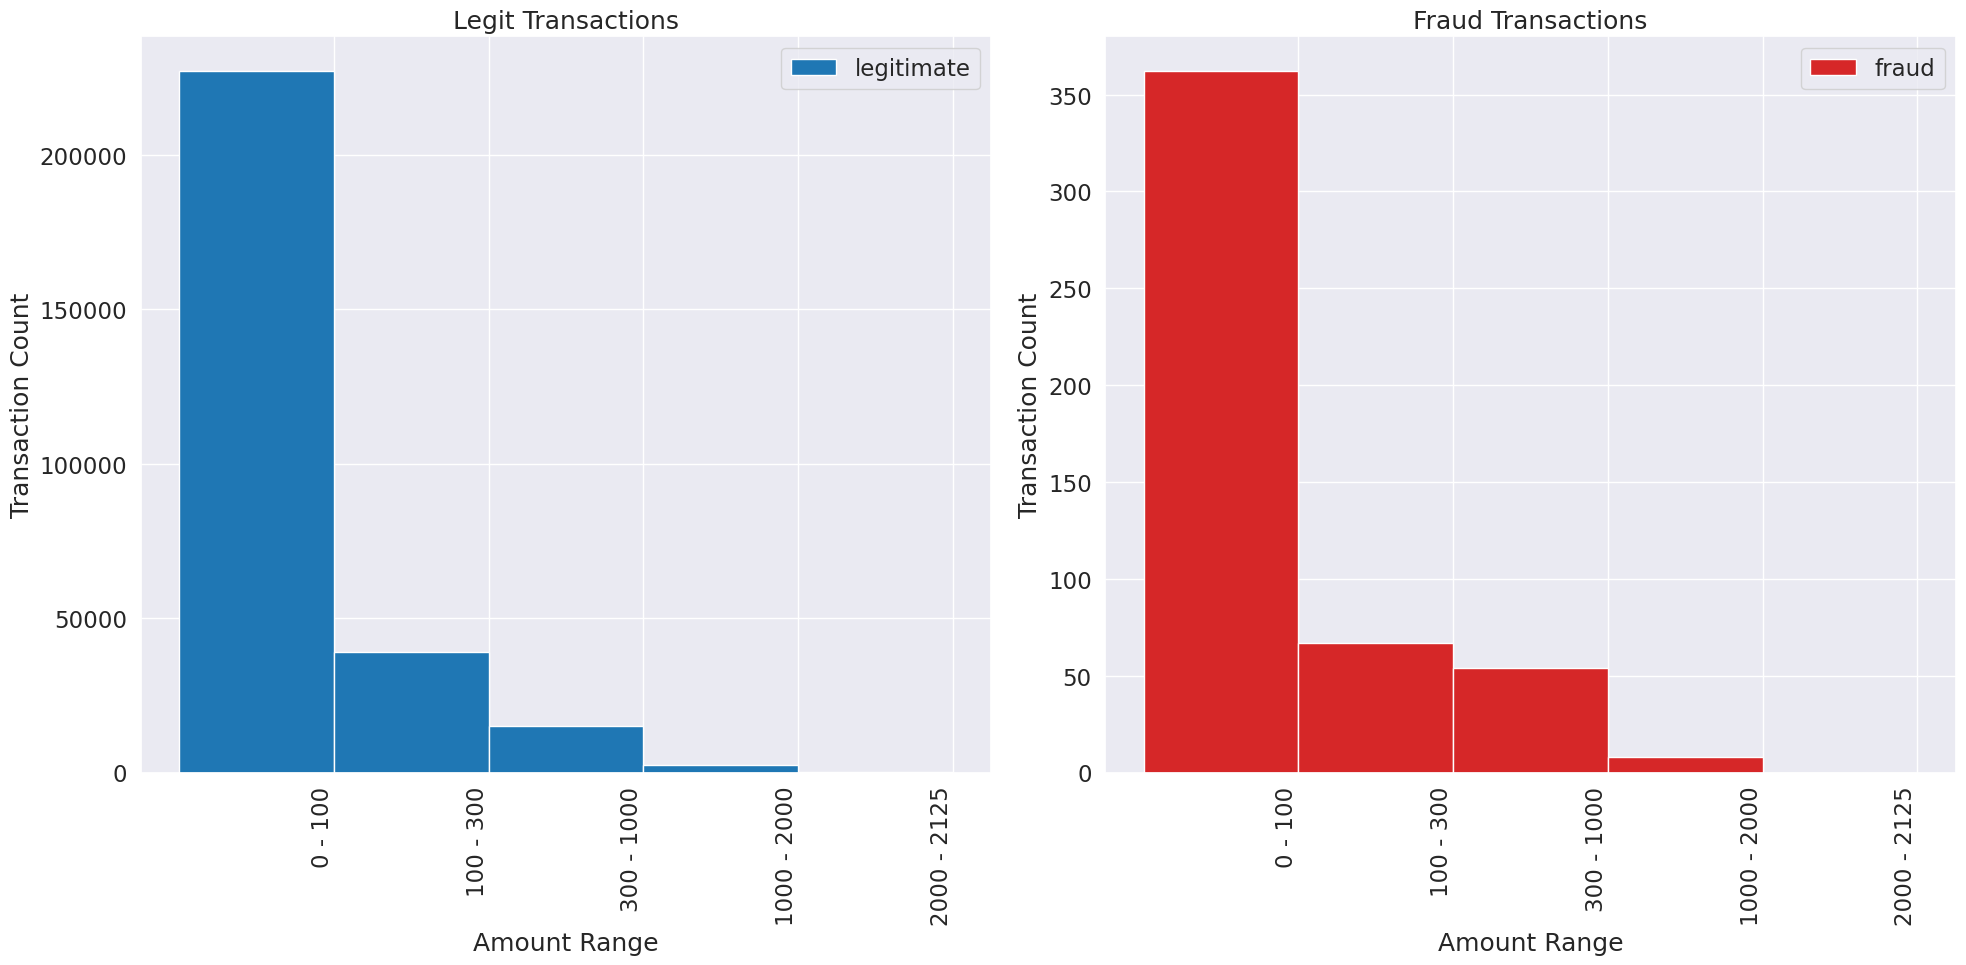

In [23]:
# Define bins for amount ranges considering the min e max value of the distribution
# min = 0
# max 2125.870
bins = [int(min(df['Amount'])), 100, 300, 1000, 2000, int(max(df['Amount']))]

# Data structure for plotting: (dataset, label, color, dataset_label)
plt_data = [
    (df_legit, "legitimate", "tab:blue", "Legit Transactions"), 
    (df_fraud, "fraud", "tab:red", "Fraud Transactions"),
]

# Create subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20,10))
fig.autofmt_xdate(rotation=90)
axs = axs.flatten()

# Set seaborn styling parameters
sns.set_context("paper")
sns.set_palette("pastel")
sns.set(font_scale=1.5)

# Iterate through plt_data to plot histograms
for i, (df, label, color, dataset_name) in enumerate(plt_data):
    data = df["Amount"].values.reshape(-1, 1)

    # Compute histogram
    hist, bin_edges = np.histogram(data, bins)

    # Plot histogram
    axs[i].bar(range(len(hist)), hist, width=1, color=color)
    axs[i].legend([label])
    axs[i].set_ylabel("Transaction Count")
    axs[i].set_title(dataset_name)

    # Set x-axis ticks to the middle of the bars
    axs[i].set_xticks([0.5 + j for j, _ in enumerate(hist)])

    # Set x-axis tick labels to show the range of each bin
    axs[i].set_xticklabels(['{} - {}'.format(bins[j], bins[j+1]) for j, _ in enumerate(hist)])

# Set common x-axis labels for the last row of subplots
axs[0].set_xlabel("Amount Range")
axs[1].set_xlabel("Amount Range")

# Show plot and save as PDF
plt.tight_layout()
plt.show()
#fig.savefig("amount_distribution.pdf", bbox_inches='tight')

In [14]:
first_transaction = df.sort_values("Time").iloc[0]["Time"]
last_transaction = df.sort_values("Time", ascending=False).iloc[0]["Time"]

# Print the first and last legitimate transactions
print("First transaction: %s" % str(first_transaction))
print("Last transaction: %s" % str(last_transaction))

First transaction: 2013-09-01 00:00:00
Last transaction: 2013-09-02 23:59:52


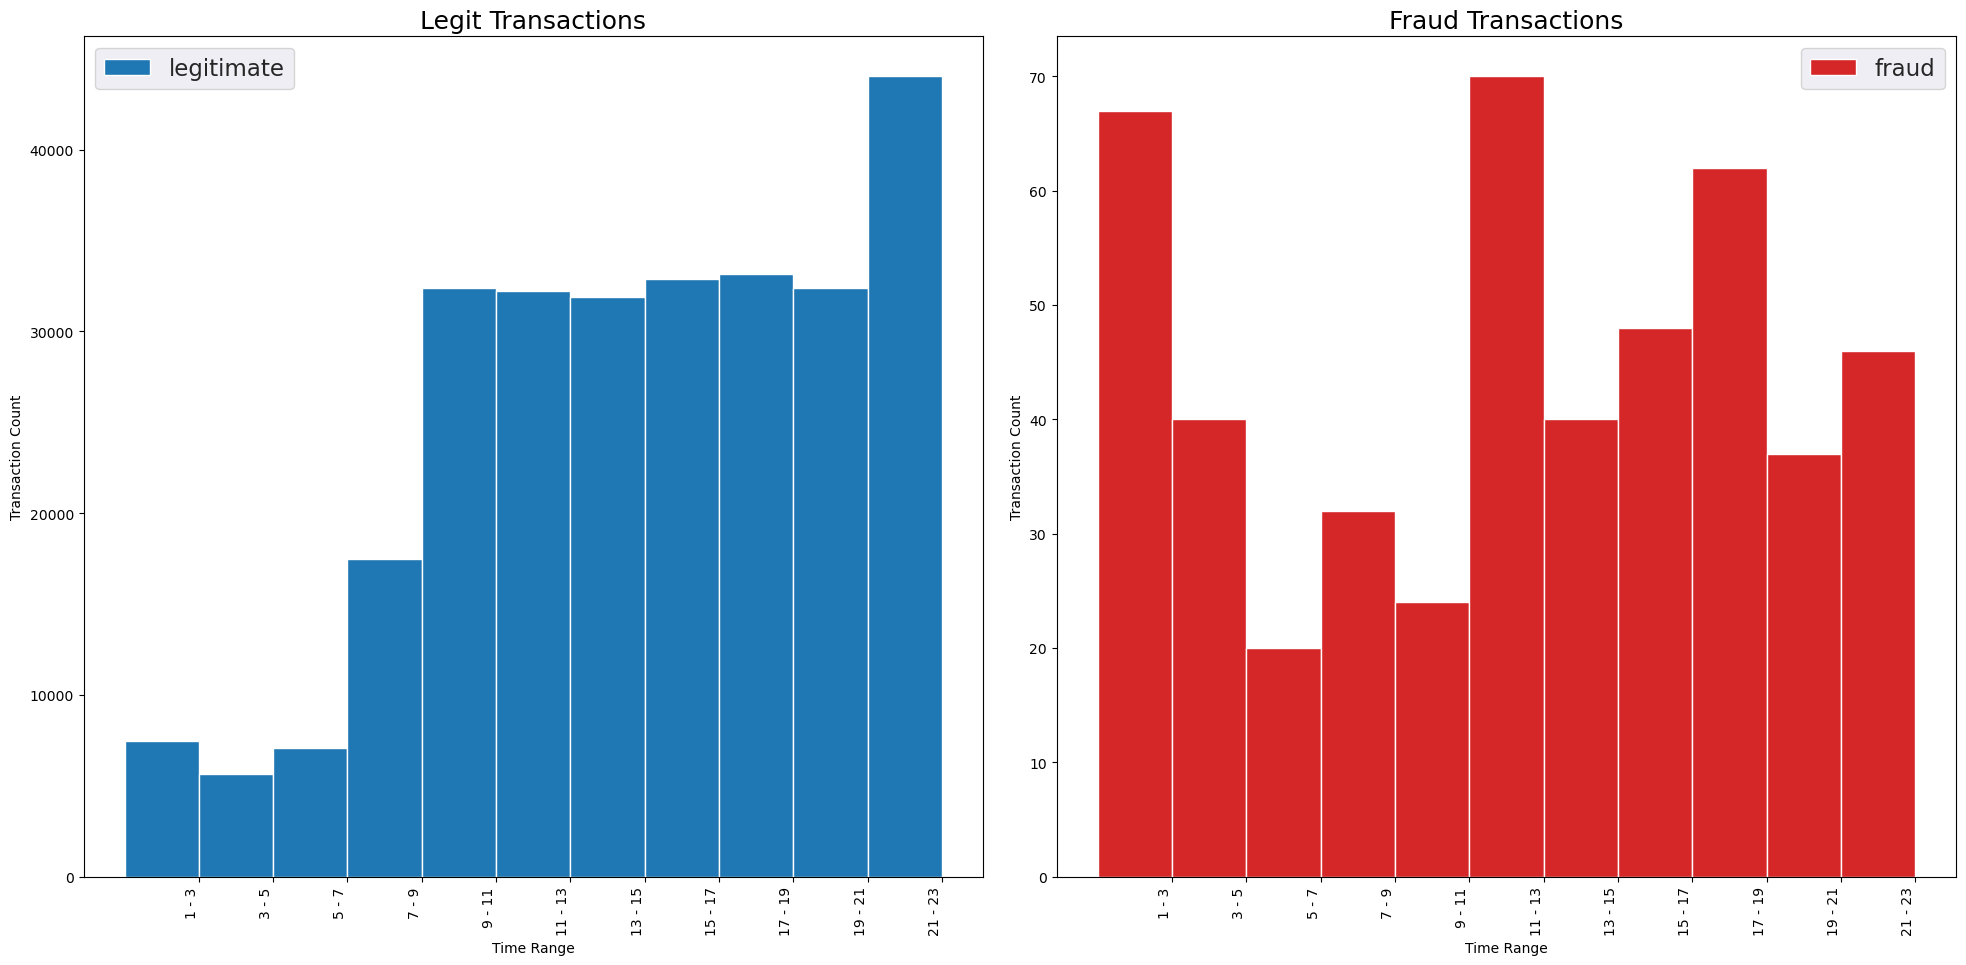

In [15]:
# Define bins for amount ranges considering the min e max value of the distribution
#
bins = [1,3,5,7,9,11,13,15,17,19,21,23]

# Data structure for plotting: (dataset, label, color, dataset_label)
plt_data = [
    (df_legit, "legitimate", "tab:blue", "Legit Transactions"), 
    (df_fraud, "fraud", "tab:red", "Fraud Transactions"),
]

# Create subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20,10))
fig.autofmt_xdate(rotation=90)
axs = axs.flatten()

# Set seaborn styling parameters
sns.set_context("paper")
sns.set_palette("pastel")
sns.set(font_scale=1.5)

# Iterate through plt_data to plot histograms
for i, (df, label, color, dataset_name) in enumerate(plt_data):
    data = df["ora"].values.reshape(-1, 1)

    # Compute histogram
    hist, bin_edges = np.histogram(data, bins)

    # Plot histogram
    axs[i].bar(range(len(hist)), hist, width=1, color=color)
    axs[i].legend([label])
    axs[i].set_ylabel("Transaction Count")
    axs[i].set_title(dataset_name)

    # Set x-axis ticks to the middle of the bars
    axs[i].set_xticks([0.5 + j for j, _ in enumerate(hist)])

    # Set x-axis tick labels to show the range of each bin
    axs[i].set_xticklabels(['{} - {}'.format(bins[j], bins[j+1]) for j, _ in enumerate(hist)])

# Set common x-axis labels for the last row of subplots
axs[0].set_xlabel("Time Range")
axs[1].set_xlabel("Time Range")

# Show plot and save as PDF
plt.tight_layout()
plt.show()
fig.savefig("time_distribution.png", bbox_inches='tight')

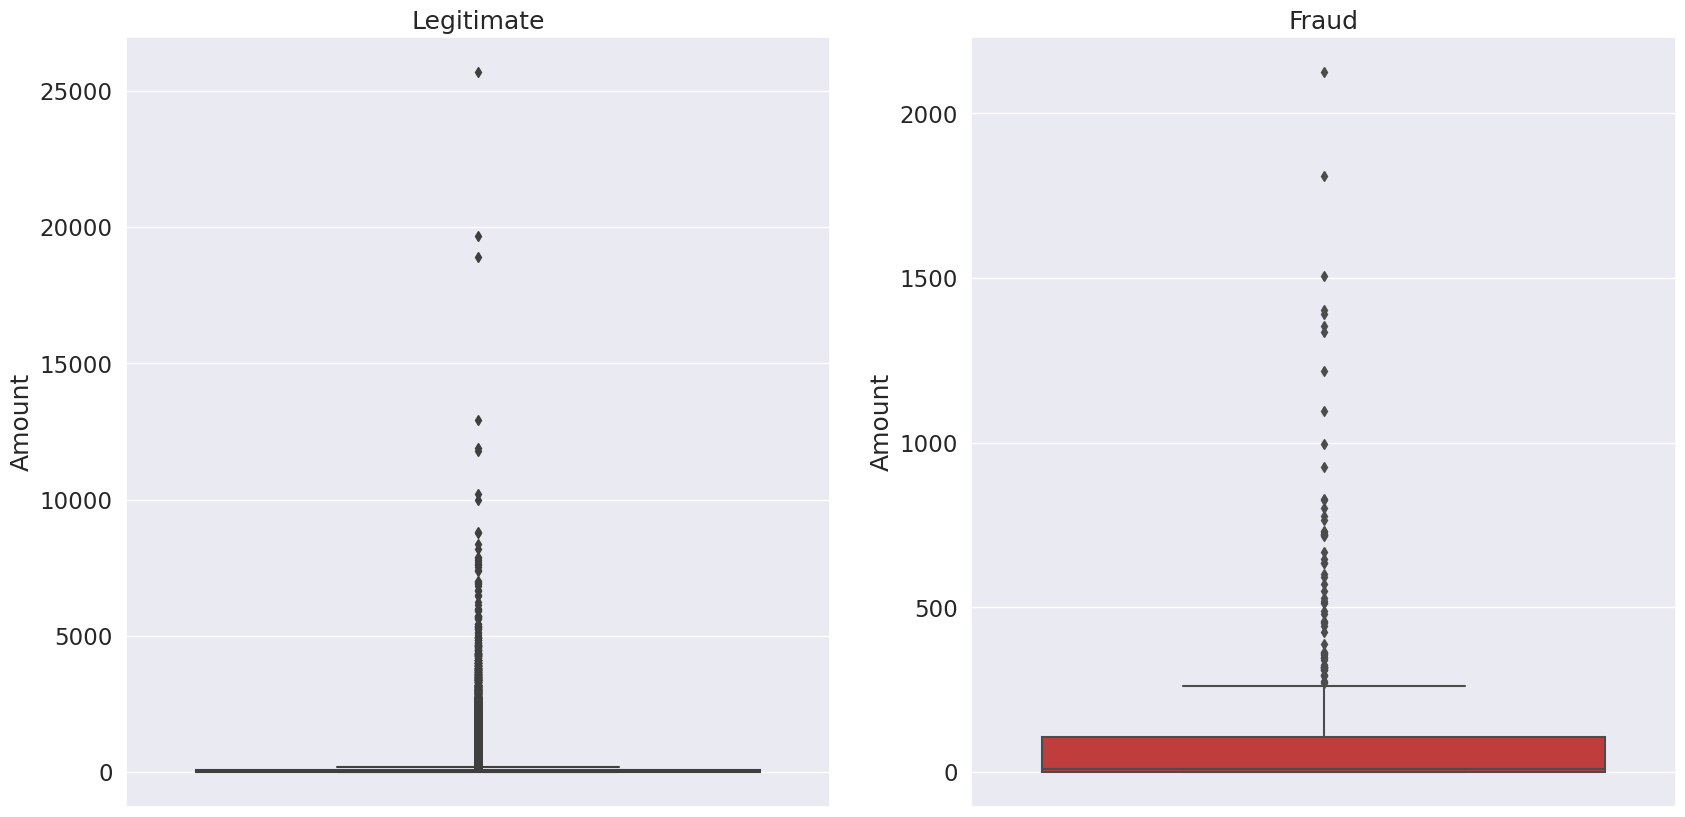

In [16]:
#Outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Crea il boxplot per il primo dataset sulla sinistra
sns.boxplot(y= df_legit['Amount'], data=df_legit, ax=ax1, palette= ["tab:blue"])
ax1.set_title('Legitimate')

# Crea il boxplot per il secondo dataset sulla destra 
sns.boxplot(y= df_fraud['Amount'], data=df_fraud, ax=ax2, palette = ["tab:red"])
ax2.set_title('Fraud')

# Mostra il grafico
plt.show()
fig.savefig("plot/Outliers.png", bbox_inches='tight')

In [17]:
# winsorized data
winsorized_data = []

# Iterate over each dataset in plt_data
for df, label, color, dataset_name in plt_data:
    # Calculate quantiles for winsorization
    q_low = df["Amount"].quantile(0.2)
    q_hi  = df["Amount"].quantile(0.90)

    # Filter data based on winsorization limits
    df_filtered = df[(df["Amount"] < q_hi) & (df["Amount"] > q_low)]
    
    # Sort filtered data by Timestamp
    df_filtered = df_filtered.sort_values(by="Time")
    
    # Append filtered and sorted dataset to winsorized_data list
    winsorized_data.append((df_filtered, label, color))

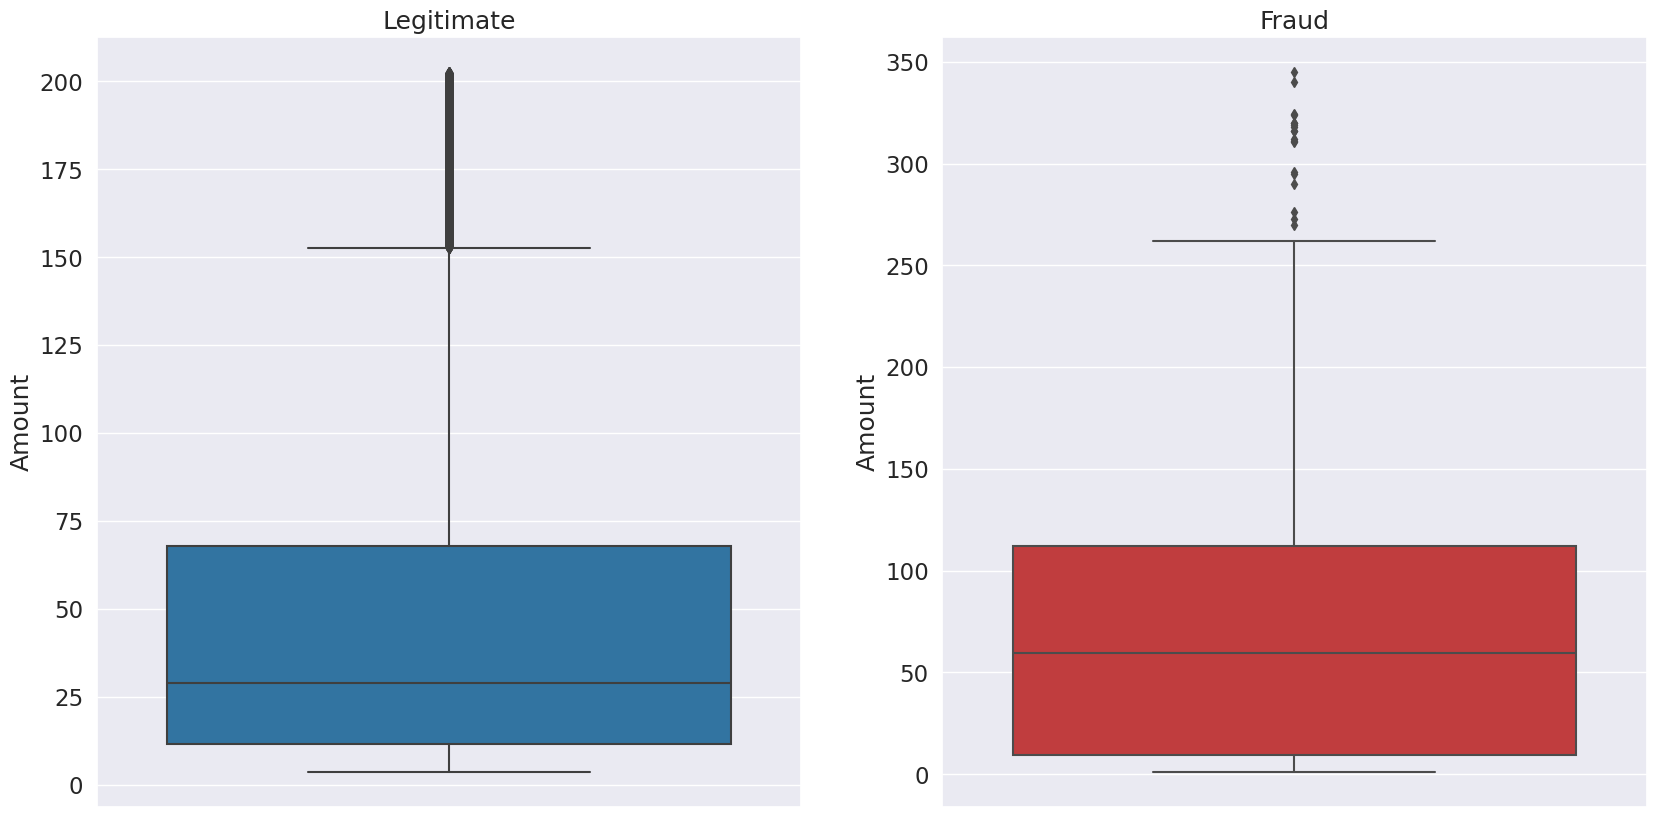

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(y= 'Amount', data=winsorized_data[0][0], ax=ax1, palette= ["tab:blue"])
ax1.set_title('Legitimate')

# Crea il boxplot per il secondo dataset sulla destra 
sns.boxplot(y= 'Amount', data=winsorized_data[1][0], ax=ax2, palette = ["tab:red"])
ax2.set_title('Fraud')
fig.savefig("plot/Outliers winsorized.png", bbox_inches='tight')

In [19]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Applica la standardizzazione alle colonne del DataFrame
time_amount_standardized = pd.DataFrame(scaler.fit_transform(df_original[['Time','Amount']]), columns=['Time','Amount'])

In [20]:
df_original.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
time_amount_standardized.head()

,Time,Amount
0,-1.996583,0.244964
1,-1.996583,-0.342475
2,-1.996562,1.160686
3,-1.996562,0.140534
4,-1.996541,-0.073403


In [22]:
df_merged = pd.merge(df_original, time_amount_standardized, left_index=True, right_index=True, suffixes=('_dfO', '_df2'))
df_merged

,Time_dfO,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount_dfO,Class,Time_df2,Amount_df2
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-1.996583,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-1.996583,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1.996562,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-1.996562,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-1.996541,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1.641931,-0.350151
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1.641952,-0.254117
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1.641974,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1.641974,-0.313249


In [23]:
# Sostituisci i valori delle colonne 
# del DataFrame originale con quelli del DataFrame unito
df_original[['Time', 'Amount']] = df_merged[['Time_df2', 'Amount_df2']]

In [24]:
df_original

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [25]:
## Split dataset

In [26]:
X = df_original.drop(labels = ['Class'], axis = 1, inplace = False)
y = df_original['Class']

In [27]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Dividiamo il dataset in training+validation (80%) e test set (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Dividiamo ulteriormente il training+validation set in training (70%) e validation set (30%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, stratify=y_train_val, random_state=42)

# Oversampling con RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Undersampling con RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Oversampling con SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


In [34]:
## TRAN WITHOUT KFOLD CROSS VALIDATION
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
 
# Liste per salvare i risultati
models = ['Logistic Regression', 'Random Forest', 'MLP', 'SVM']
train_scores = []
val_scores = []
test_scores = []
 
# Funzione per addestrare e valutare un modello
def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test, balance):
    print(f"****** {model.__class__.__name__} ******")
    print(f"*** {balance} ***")
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    test_score = model.score(X_test, y_test)
    train_scores.append(train_score)
    val_scores.append(val_score)
    test_scores.append(test_score)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    fig = plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    fig.savefig(f"plot/ROC {model.__class__.__name__} - {balance}.png", bbox_inches='tight')

****** LogisticRegression ******
*** Over Sampling ***


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.91      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



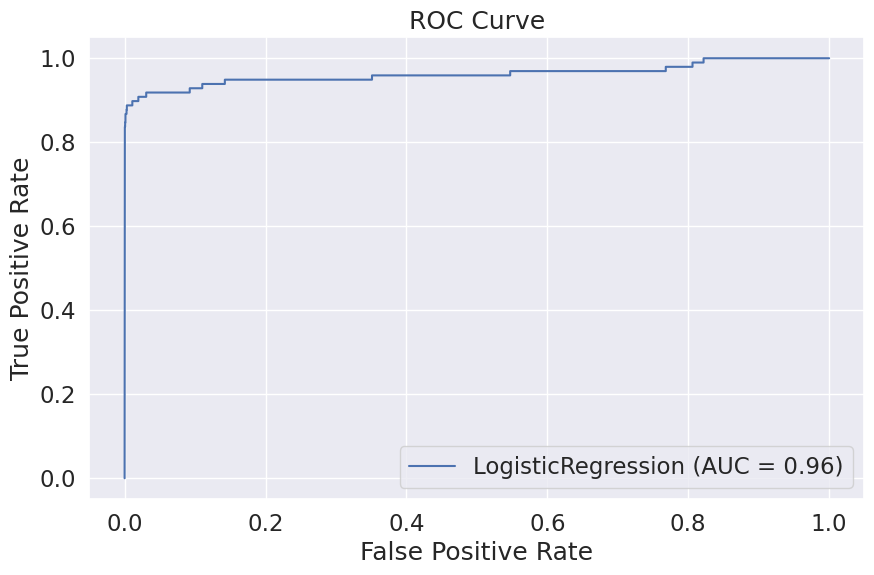

In [35]:
# Regressione Logistica
lr = LogisticRegression(random_state=42)
train_and_evaluate(lr, X_train_ros, y_train_ros, X_val, y_val, X_test, y_test, 'Over Sampling')

****** LogisticRegression ******
*** Undersampling ***
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



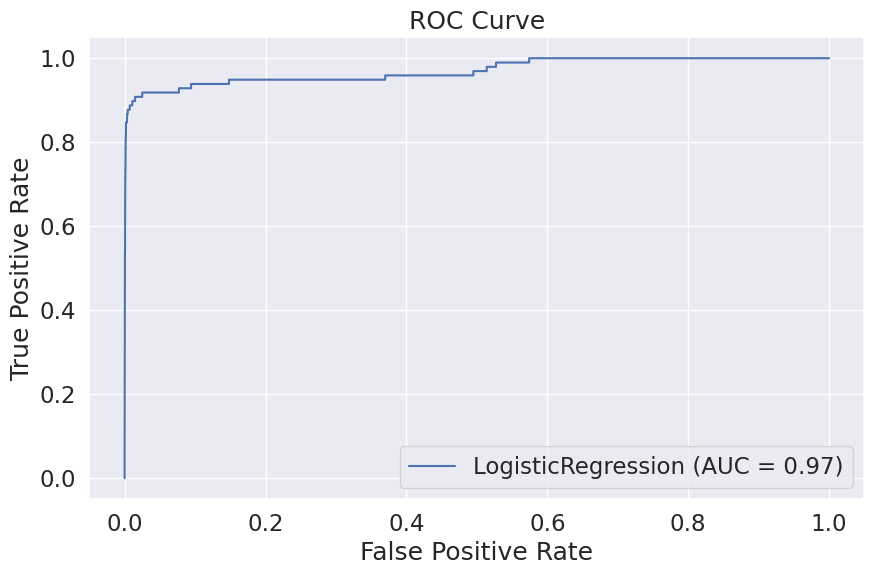

In [36]:
train_and_evaluate(lr, X_train_rus, y_train_rus, X_val, y_val, X_test, y_test, 'Undersampling')

****** LogisticRegression ******
*** SMOTE ***


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.91      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



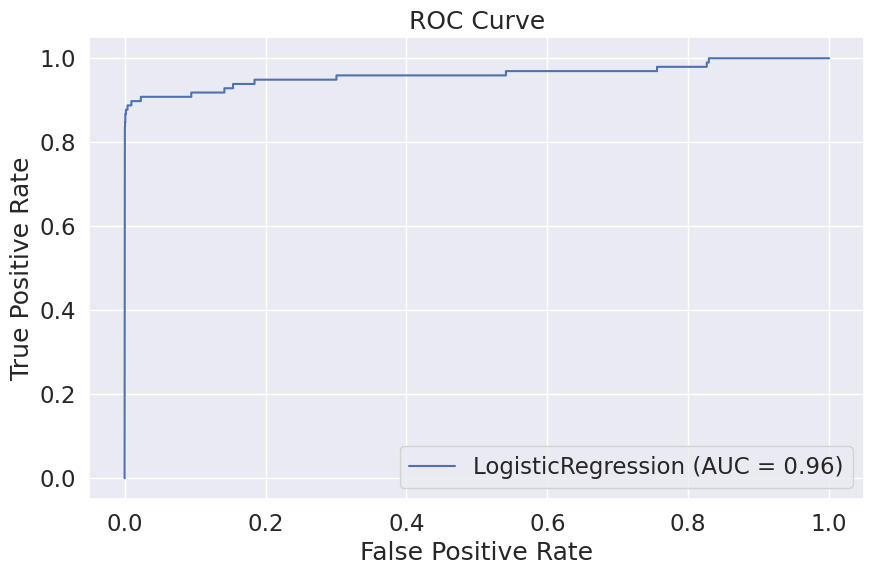

In [37]:
train_and_evaluate(lr, X_train_smote, y_train_smote, X_val, y_val, X_test, y_test, 'SMOTE')

****** RandomForestClassifier ******
*** Oversampling ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



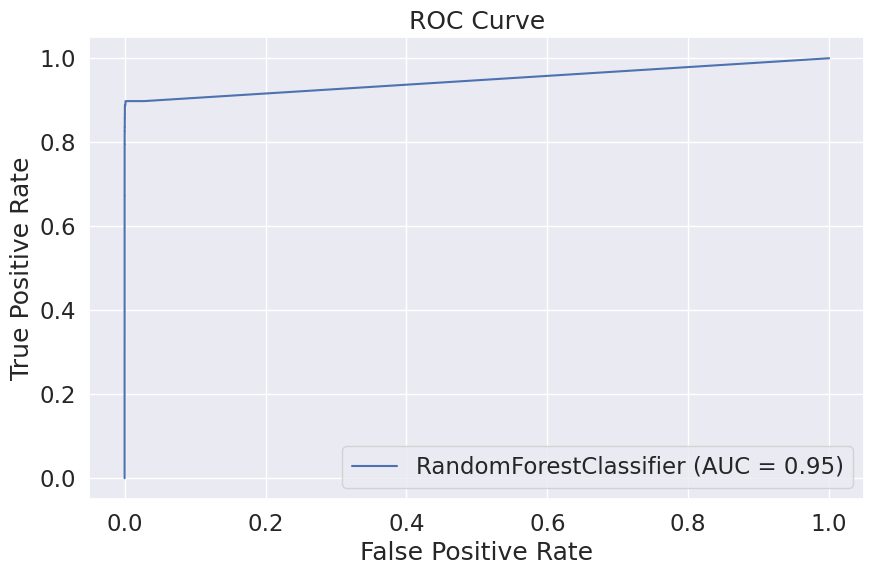

In [38]:
rf = RandomForestClassifier(random_state=42)
train_and_evaluate(rf, X_train_ros, y_train_ros, X_val, y_val, X_test, y_test, 'Oversampling')

****** RandomForestClassifier ******
*** Undersampling ***
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.91      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



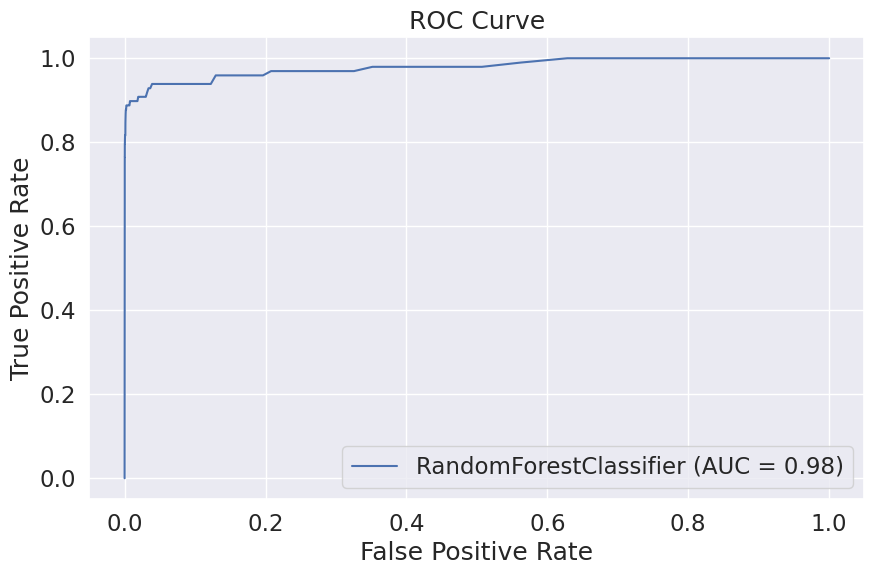

In [39]:
train_and_evaluate(rf, X_train_rus, y_train_rus, X_val, y_val, X_test, y_test, 'Undersampling')

****** RandomForestClassifier ******
*** SMOTE ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



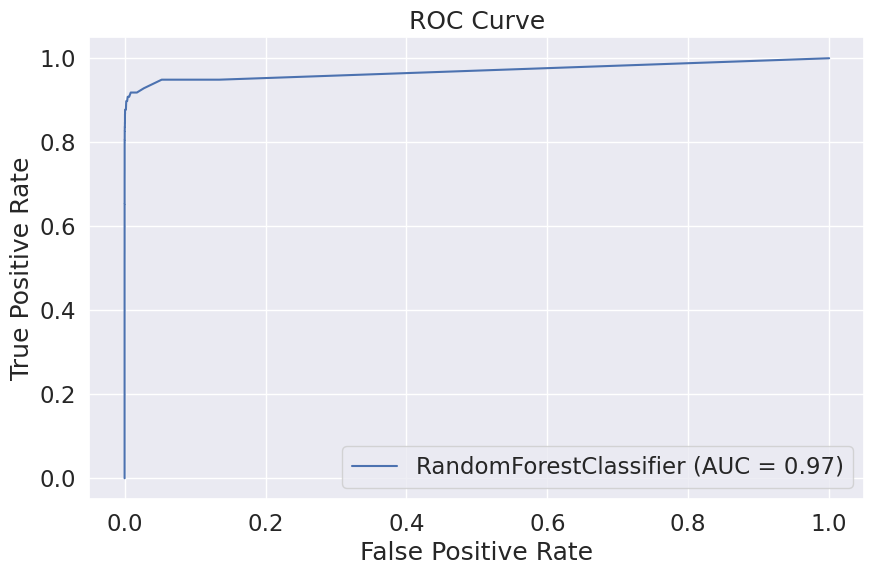

In [40]:
train_and_evaluate(rf, X_train_smote, y_train_smote, X_val, y_val, X_test, y_test, 'SMOTE')

****** MLPClassifier ******
*** Oversampling ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.82      0.78        98

    accuracy                           1.00     56962
   macro avg       0.88      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962



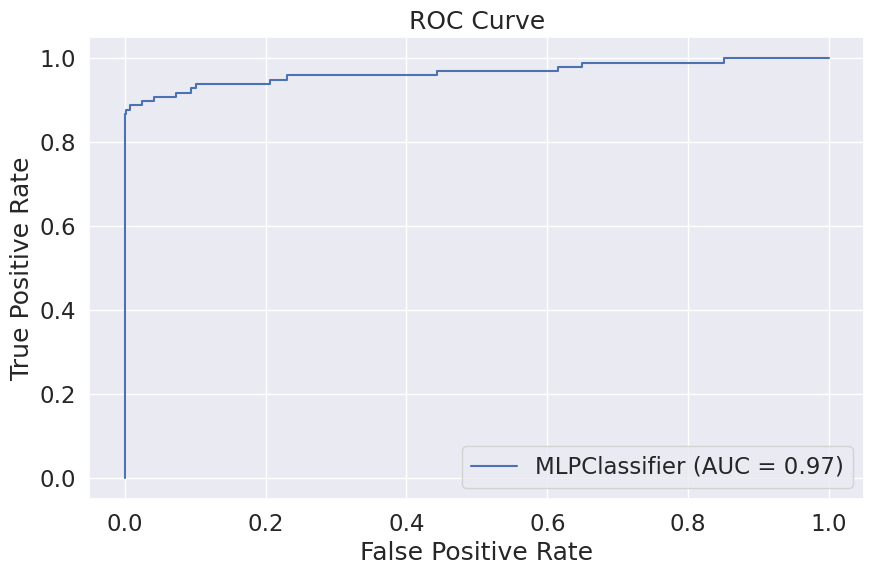

In [41]:
mlp = MLPClassifier(random_state=42)
train_and_evaluate(mlp, X_train_ros, y_train_ros, X_val, y_val, X_test, y_test, 'Oversampling')

****** MLPClassifier ******
*** Undersampling ***


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.91      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



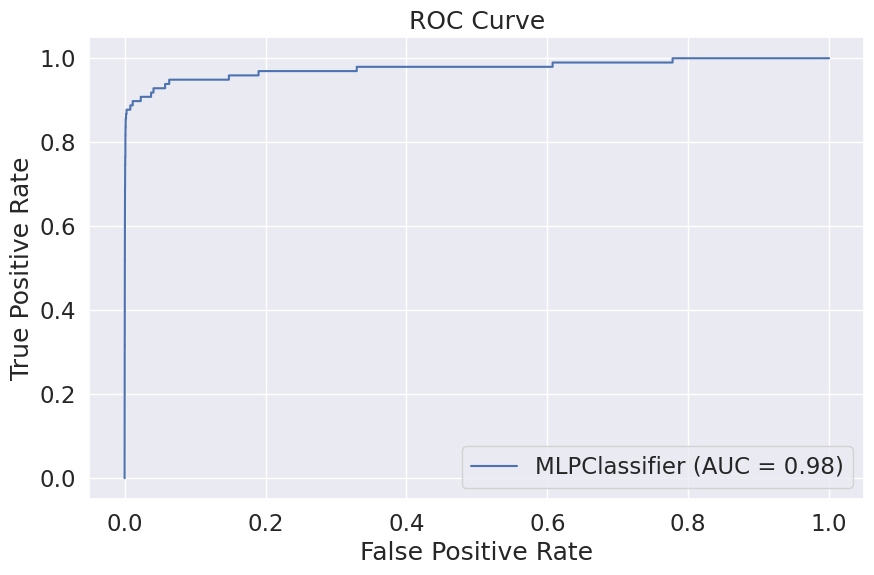

In [42]:
train_and_evaluate(mlp, X_train_rus, y_train_rus, X_val, y_val, X_test, y_test, 'Undersampling')

****** MLPClassifier ******
*** SMOTE ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.80      0.78        98

    accuracy                           1.00     56962
   macro avg       0.88      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



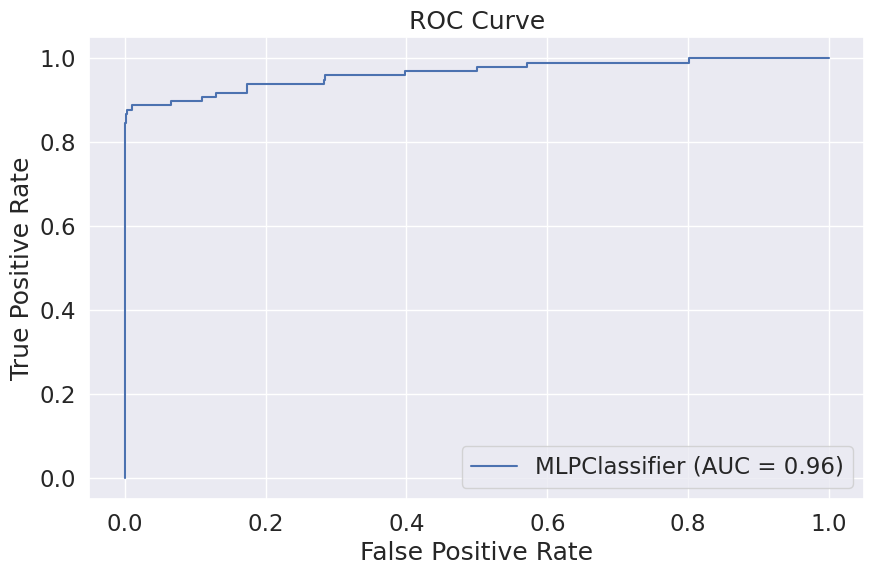

In [43]:
train_and_evaluate(mlp, X_train_smote, y_train_smote, X_val, y_val, X_test, y_test, 'SMOTE')